In [40]:
import requests

BASE_URL = "https://api-football-v1.p.rapidapi.com/v3/"
HEADERS = {
    "X-RapidAPI-Key": "d91d91c157msh4822f242ff3b048p163053jsn9f94f3a7f55b",
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

def fetch_fixtures(league_id, season):
    """Obtient les identifiants des 3 premiers matchs pour une ligue et une saison spécifiques."""
    response = requests.get(
        BASE_URL + f"fixtures?league={league_id}&season={season}", headers=HEADERS
    )
    data = response.json()
    # Récupère uniquement les IDs des 3 premiers matchs
    return [fixture['fixture']['id'] for fixture in data['response'][:3]]


def fetch_events(fixture_id):
    """Obtient les événements pour un match spécifique."""
    response = requests.get(
        BASE_URL + "fixtures/events", headers=HEADERS, params={"fixture": fixture_id}
    )
    return response.json()['response']

def fetch_event_stats(league_id, season):
    """Récupère les statistiques d'événements pour les 3 premiers matchs d'une ligue et d'une saison donnée."""
    fixture_ids = fetch_fixtures(league_id, season)
    
    yellow_cards = 0
    red_cards = 0
    penalties = 0
    
    for fixture_id in fixture_ids:
        response = requests.get(
            BASE_URL + "fixtures/events",
            headers=HEADERS,
            params={"fixture": fixture_id}
        )
        events = response.json()["response"]
    

        for event in events:
            if event['type'] == "Card" and event['detail'] == "Yellow Card":
                yellow_cards += 1
            elif event['type'] == "Card" and event['detail'] == "Red Card":
                red_cards += 1
            elif event['type'] == "Goal" and event['detail'] == "Penalty":
                penalties += 1
            elif event['type'] == "Goal" and event['detail'] == "Missed Penalty":
                penalties += 1

    return {
        "yellow_cards": yellow_cards,
        "red_cards": red_cards,
        "penalties": penalties
    }

# Exemple d'utilisation :
stats = fetch_event_stats(4, 2016)
print(stats)



{'yellow_cards': 9, 'red_cards': 0, 'penalties': 10}


In [47]:
import requests

BASE_URL = "https://api-football-v1.p.rapidapi.com/v3/"
HEADERS = {
    "X-RapidAPI-Key": "d91d91c157msh4822f242ff3b048p163053jsn9f94f3a7f55b",
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}

def fetch_yellow_cards(league_id, season):
    # Étape 1: Récupérer la liste des matchs
    fixtures_response = requests.get(
        BASE_URL + "fixtures?league=" + str(league_id) + "&season=" + str(season), headers=HEADERS
    )
    fixtures_data = fixtures_response.json()
    match_ids = [fixture['fixture']['id'] for fixture in fixtures_data['response']]

    # Étape 2: Limiter à 3 matchs
    match_ids = match_ids[:3]

    cartons_jaunes = []

    # Étape 3 et 4: Pour chaque match, obtenir les détails des événements et compter les cartons jaunes
    for match_id in match_ids:
        events_response = requests.get(
            BASE_URL + "fixtures/events", headers=HEADERS, params={"fixture": match_id}
        )
        events_data = events_response.json()
        yellow_cards_count = sum([1 for event in events_data['response'] if event['type'] == 'Card' and event['detail'] == 'Yellow Card'])
        cartons_jaunes.append(yellow_cards_count)

    return cartons_jaunes

def fetch_red_cards(league_id, season):
    # Étape 1: Récupérer la liste des matchs
    fixtures_response = requests.get(
        BASE_URL + "fixtures?league=" + str(league_id) + "&season=" + str(season), headers=HEADERS
    )
    fixtures_data = fixtures_response.json()
    match_ids = [fixture['fixture']['id'] for fixture in fixtures_data['response']]

    # Étape 2: Limiter à 3 matchs
    match_ids = match_ids[:3]

    cartons_rouge = []

    # Étape 3 et 4: Pour chaque match, obtenir les détails des événements et compter les cartons jaunes
    for match_id in match_ids:
        events_response = requests.get(
            BASE_URL + "fixtures/events", headers=HEADERS, params={"fixture": match_id}
        )
        events_data = events_response.json()
        red_cards_count = sum([1 for event in events_data['response'] if event['type'] == 'Card' and event['detail'] == 'Red Card'])
        cartons_rouge.append(red_cards_count)

    return cartons_rouge

def fetch_penalty(league_id, season):
    # Étape 1: Récupérer la liste des matchs
    fixtures_response = requests.get(
        BASE_URL + "fixtures?league=" + str(league_id) + "&season=" + str(season), headers=HEADERS
    )
    fixtures_data = fixtures_response.json()
    match_ids = [fixture['fixture']['id'] for fixture in fixtures_data['response']]

    # Étape 2: Limiter à 3 matchs
    match_ids = match_ids[:5]

    penalty = []

    # Étape 3 et 4: Pour chaque match, obtenir les détails des événements et compter les cartons jaunes
    for match_id in match_ids:
        events_response = requests.get(
            BASE_URL + "fixtures/events", headers=HEADERS, params={"fixture": match_id}
        )
        events_data = events_response.json()
        count1 = sum([1 for event in events_data['response'] if event['type'] == 'Goal' and event['detail'] == 'Penalty'])
        count2 = sum([1 for event in events_data['response'] if event['type'] == 'Goal' and event['detail'] == 'Missed Penalty'])
        penalty.append(count1 + count2)

    return penalty

# Utilisation de la fonction pour obtenir le nombre de cartons jaunes pour une ligue et une saison spécifiques
league_id = 4  # Remplacez par l'ID de la ligue souhaitée
season = "2016"  # Remplacez par la saison souhaitée
cartons_rouge = fetch_penalty(league_id, season)
print(cartons_rouge)  # Affiche le nombre de cartons jaunes pour les 3 premiers matchs


[10, 0, 0, 1, 1]


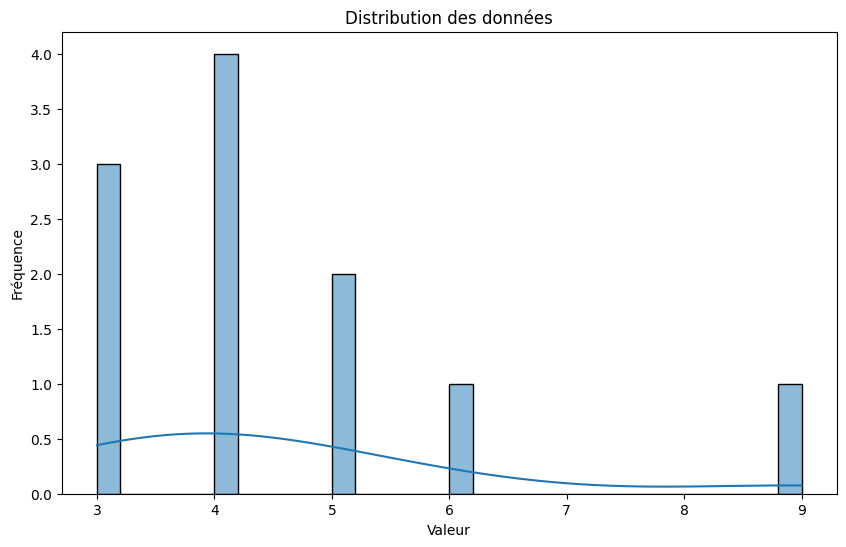

La distribution ne semble pas normale (test de Shapiro-Wilk)


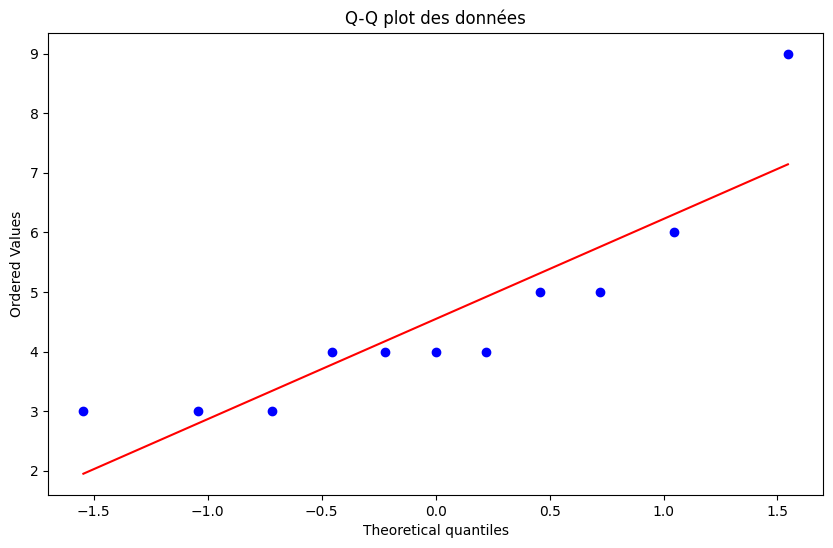

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

def analyse_distribution(data):
    """
    Analyse la distribution d'une liste de données en utilisant un histogramme, un test de Shapiro-Wilk et un Q-Q plot.
    
    Parameters:
    - data : list
        Liste de données à analyser.
    """
    
    # Histogramme
    plt.figure(figsize=(10,6))
    sns.histplot(data, kde=True, bins=30)
    plt.title("Distribution des données")
    plt.xlabel("Valeur")
    plt.ylabel("Fréquence")
    plt.show()

    # Test de Shapiro-Wilk pour vérifier la normalité
    stat, p = shapiro(data)
    if p > 0.05:
        print("La distribution semble normale (test de Shapiro-Wilk)")
    else:
        print("La distribution ne semble pas normale (test de Shapiro-Wilk)")

    # Q-Q plot
    plt.figure(figsize=(10,6))
    probplot(data, plot=plt)
    plt.title("Q-Q plot des données")
    plt.show()

# Exemple d'utilisation
cartons_jaunes = [5, 3, 4, 6, 4, 3, 3, 4, 5, 4,9]
analyse_distribution(cartons_jaunes)

